<a href="https://colab.research.google.com/github/KleberBarilli/Codes-Python/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
n = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#dados coletados na decada de 1960 a 1980
df= pd.read_csv(n, comment='#', header=None, sep=",")

df.columns=("gravidezes","glicose","pressaoSanguinea","dobraCutanea","insulina","imc","fpd","idade","resultado")
#fpd = Função pedigree de diabetes -  risco hereditário de obter a doença


In [ ]:
df.shape

(768, 9)

In [ ]:
df.groupby('resultado').size()

resultado
0    500
1    268
dtype: int64

In [ ]:
df.tail()

,gravidezes,glicose,pressaoSanguinea,dobraCutanea,insulina,imc,fpd,idade,resultado
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:

normaliza = df.copy()
for item in df.columns:
    max_value = df[item].max()
    min_value = df[item].min()
    normaliza[item] = (df[item] - min_value) / (max_value - min_value)
    
    
df = normaliza

df.tail()

,gravidezes,glicose,pressaoSanguinea,dobraCutanea,insulina,imc,fpd,idade,resultado
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0
767,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.101196,0.033333,0.0


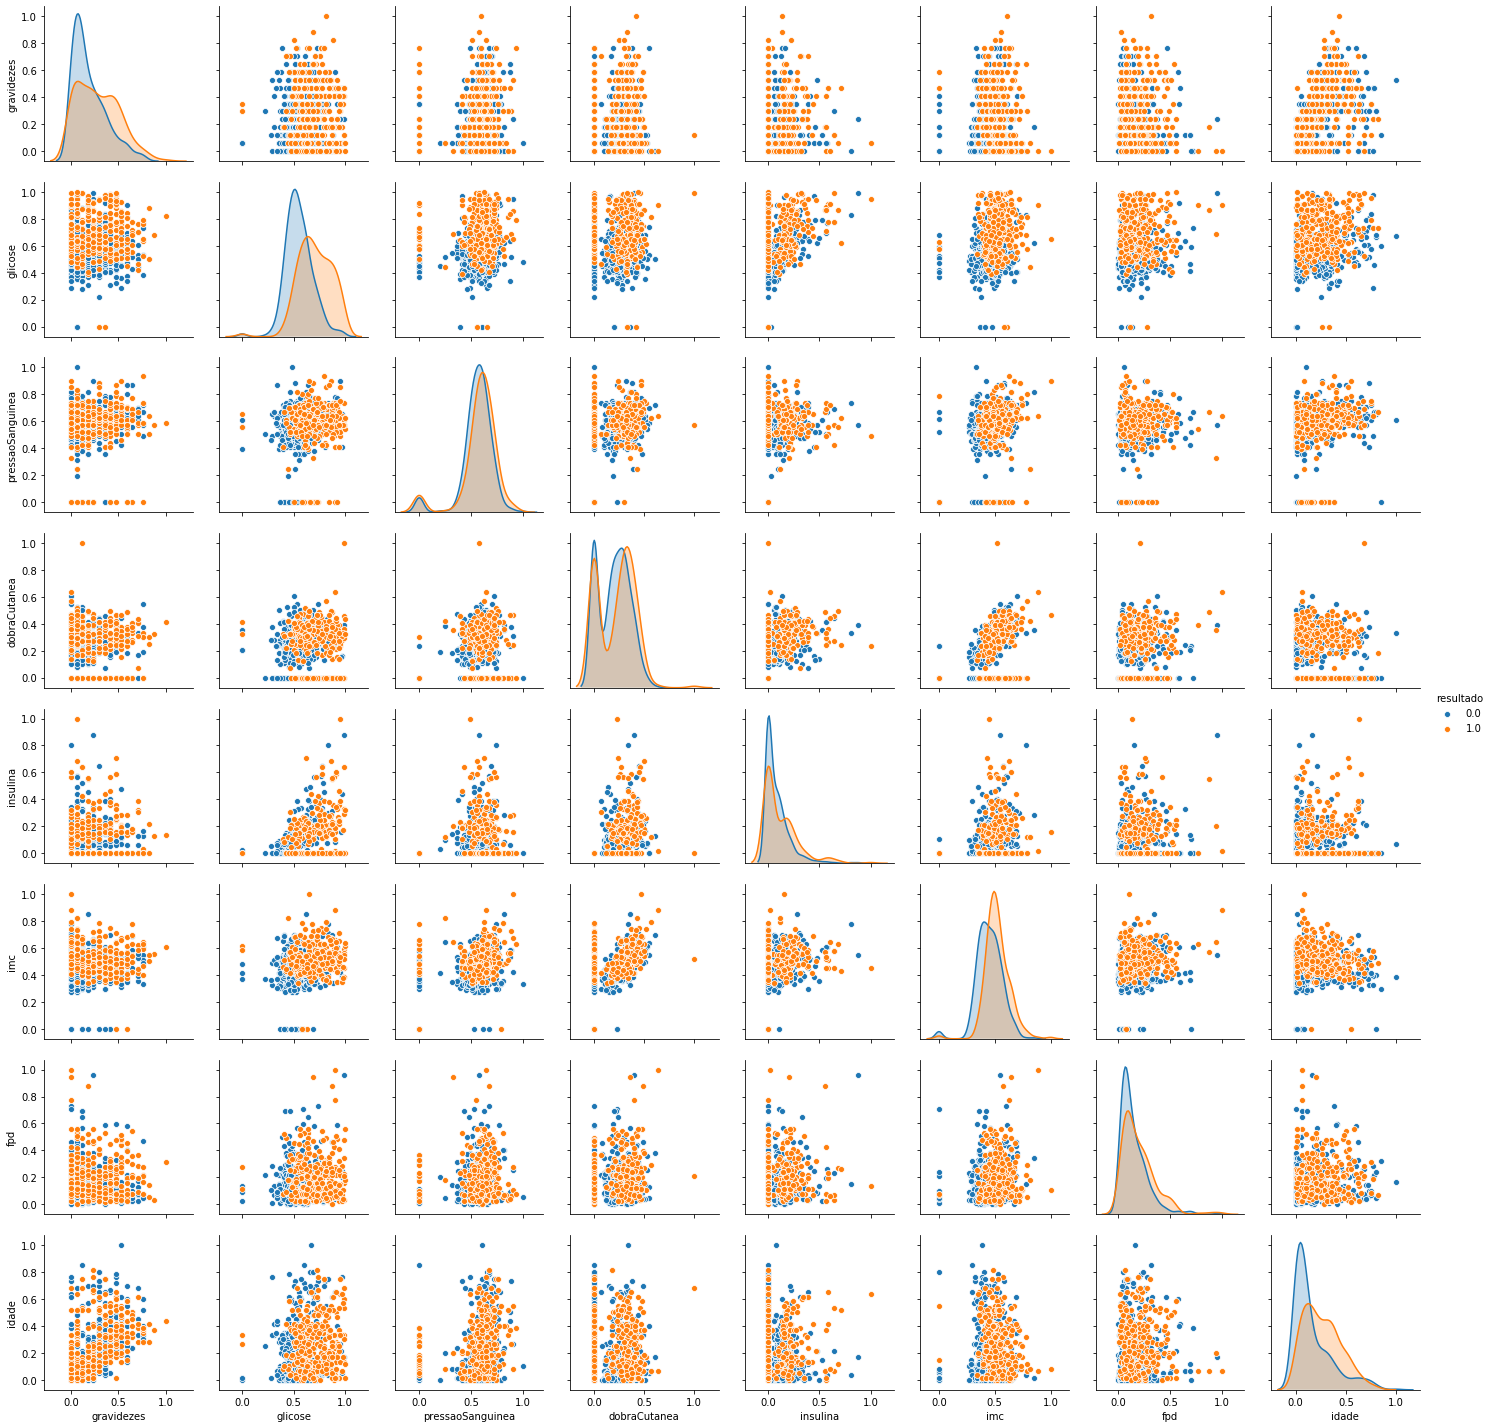

In [ ]:
import seaborn as sns

#sns.scatterplot(data=df,  y='resultado', x='gravidezes',hue='idade' )
#x = df[['gravidezes','idade','resultado']]
sns.pairplot(data=df, hue='resultado', vars=df.columns[:-1])


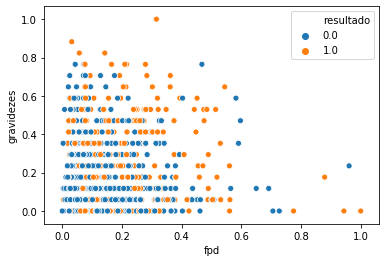

In [ ]:
sns.scatterplot(data=df,  y='gravidezes', x='fpd' ,hue='resultado')
#quanto mais filhos teve, aumenta um pouco as chances de diabete, e quanto maior a hereditarieade tambem

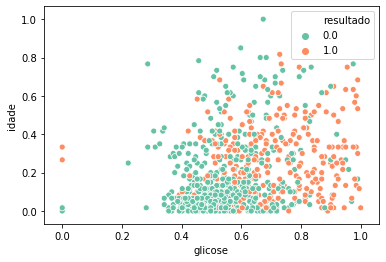

In [ ]:
sns.scatterplot(data=df,  y='idade', x='glicose' ,hue='resultado',palette="Set2")
#a idade nao importa muito, se a glicose sendo alta é um fator relevante pras diabetes

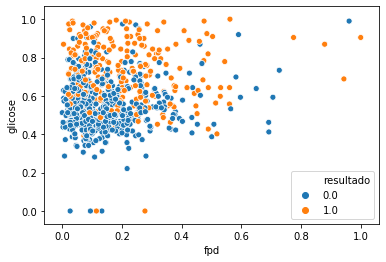

In [ ]:
sns.scatterplot(data=df,  x='fpd', y='glicose' ,hue='resultado')
#obs: glicose sempre se sobrepoe sobre o fpd.. 
#1- a diabete nao é totalmente hereditaria, 2 - a funcao pedigree precisa ser melhorada, 3 - poucos dados no dataset

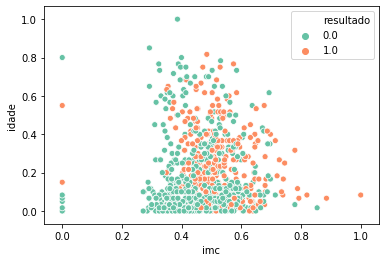

In [ ]:
sns.scatterplot(data=df,  y='idade', x='imc' ,hue='resultado',palette="Set2")

In [ ]:
# a idade nao tem muita relação com aparecimento de diabates
#mesma coisa vale para a funcao pedigree,
# o que da pra concluir é que quanto mais valores altos p/ gravidezes, dobra cutanea, glicose e imc, 
#tendem a ser mais propicio a desenvolverem diabates

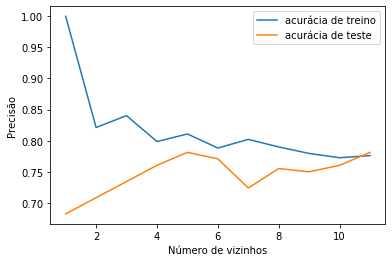

In [ ]:
from sklearn.model_selection import train_test_split
knn_treino_x, knn_teste_x, knn_treino_y, knn_teste_y = train_test_split(df.loc[:, df.columns != 'resultado'], df['resultado'], stratify=df['resultado'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
acuracia_treino = []
acuracia_teste = []

tamanho = range(1, 12)
for n_neighbors in tamanho:
   
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(knn_treino_x, knn_treino_y)
    
    acuracia_treino.append(knn.score(knn_treino_x, knn_treino_y))
    acuracia_teste.append(knn.score(knn_teste_x, knn_teste_y))
    
plt.plot(tamanho, acuracia_treino, label="acurácia de treino")
plt.plot(tamanho, acuracia_teste, label="acurácia de teste")
plt.ylabel("Precisão")
plt.xlabel("Número de vizinhos")
plt.legend()
plt.savefig('knn_compare_model')


In [ ]:

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(knn_treino_x, knn_treino_y)

pred = knn.predict(knn_teste_x)


acuracia = accuracy_score(knn_teste_y, pred) * 100
print("A acurácia usando KNN foi de {:.2f}%".format(acuracia))

A acurácia usando KNN foi de 78.12%


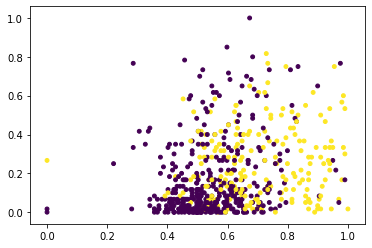

In [ ]:
plt.scatter(knn_treino_x.glicose, knn_treino_x.idade, c=knn_treino_y, s=15)

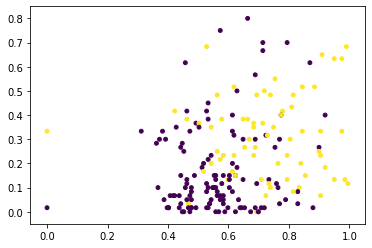

In [ ]:
plt.scatter(knn_teste_x.glicose, knn_teste_x.idade, c=knn_teste_y, s=15)

In [ ]:
from sklearn.svm import LinearSVC
import numpy as np

x = df[['gravidezes', 'idade','fpd','pressaoSanguinea','dobraCutanea','insulina','glicose','imc']]
y = df['resultado']

In [ ]:
SEED = 23324
np.random.seed(SEED)


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.30,
                                                       stratify = y)
print("Treino com  {} elementos e Teste com {} elementos"  .format(len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de {:.2f}%" .format(acuracia))

Treino com  537 elementos e Teste com 231 elementos
A acurácia foi de 84.85%


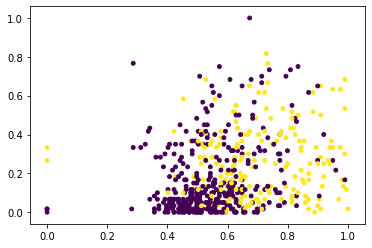

In [ ]:
plt.scatter(treino_x.glicose, treino_x.idade, c=treino_y, s=15)

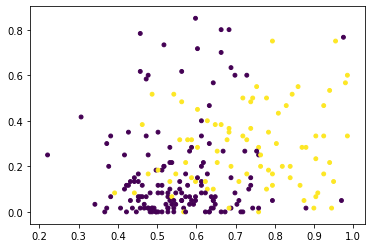

In [ ]:

plt.scatter(teste_x.glicose, teste_x.idade, c=teste_y, s=15)